<a href="https://colab.research.google.com/github/AnaBelenCarbajal/Thesis/blob/main/Dataset_Human_Category_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset novel shapes**

1) Installing packages

In [303]:
#packages
import os
import pandas as pd
import torch
import numpy as np
from matplotlib import pyplot as plt

from random import choice, randint
import torchvision.transforms.functional as transform
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms import v2
from torch.utils.data import DataLoader

from PIL import Image

In [ ]:
# unzip folder (previously uploaded in collab)
!unzip CategoryLearningStimuli.zip -d my_data

In [2]:
# root directory to data
root = "my_data/Stimuli_Set1/"

In [8]:
# get category labels
image_ID = os.listdir(root)

#remove ".DS_Store"
image_ID.remove(".DS_Store")

2) Defining parameters

In [156]:
# conditions
condition1 = {
    'A':[-30, 30],  #low var
    'D':[-80, 80]   #high var
    }

condition2 = {
    'A':[-80, 80], #high var
    'D':[-30, 30]  #low var
    }

In [20]:
# reference shapes angles --> categories
reference_shapeA = 0
reference_shapeB = 310
reference_shapeC = 260
reference_shapeD = 210

3) Get angles and directory

In [25]:
# get angles
angles = []
for image in image_ID:
  get_angle = image.replace('.jpg', '')
  transform_to_int = int(get_angle)
  angles.append(transform_to_int)

In [ ]:
# get image directories
img_dir = []

for image in image_ID:
  folder_path = root + image
  img_dir.append(folder_path)

img_dir[:10]

4) create datasets

In [220]:
data =  {'angle' : angles,
         'image' : image_ID,
         'img_dir' : img_dir}

In [ ]:
df_data = pd.DataFrame(data)
df_data

5) Define functions

In [214]:
# functions to create datasets

# create datasets for reference shape A and D
def CreateLabelsAD (reference_shape, condition, dataset, stringCat):
  angles = dataset['angle'].tolist()
  labels = []

  for angle in angles:

    left_threshold = reference_shape + condition[stringCat][0]
    right_threshold = reference_shape + condition[stringCat][1]

    if stringCat == "A":
      left_threshold = left_threshold + 360
      if angle >= left_threshold or angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition
    else:
      if angle >= left_threshold and angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition

    labels.append(label)
  return labels

# create datasets for reference shape B and C

def CreateLabelsBC (reference_shape, condition, dataset, stringCat):
  angles = dataset['angle'].tolist()
  labels = []

  if stringCat == "B":
    Cat_boundary = "A"
  elif stringCat == "C":
    Cat_boundary = "D"
  else:
    print('use function CreateLabelsAD')

  for angle in angles:
    left_threshold = reference_shape + condition[Cat_boundary][0]
    right_threshold = reference_shape + condition[Cat_boundary][1]

    if right_threshold > 360:
      right_threshold = right_threshold - 360
      if angle >= left_threshold or angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition
    else:
      if angle >= left_threshold and angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition

    labels.append(label)
  return labels

# Create actual dataframe
def CreateDataframe (labels, dataframe):
  dataframe["label"] = labels
  dataframe = dataframe.sort_values('angle')
  return dataframe

# Create dictionary data
def CreateDictionary (dataframe):
  data_dicts = []

  for i in range(len(dataframe)):
    angle = dataframe.iloc[i, 0]
    image = dataframe.iloc[i, 1]
    img_dir = dataframe.iloc[i, 2]
    label = dataframe.iloc[i, 3]

    individual_dic =  {'angle' : angle,
                       'image' : image,
                       'img_dir' : img_dir,
                       'label' : label}

    data_dicts.append(individual_dic)
  return data_dicts

6) Create datasets

In [215]:
# COND1 : creating dataframes

#refA
labels_RefA_Cond1 = CreateLabelsAD(reference_shapeA, condition1, df_data, "A")
df_RefA_Cond1 = CreateDataframe(labels_RefA_Cond1, df_data)
dict_RefA_Cond1 = CreateDictionary(df_RefA_Cond1)

#refB
labels_RefB_Cond1 = CreateLabelsBC(reference_shapeB, condition1, df_data, "B")
df_RefB_Cond1 = CreateDataframe(labels_RefB_Cond1, df_data)
dict_RefB_Cond1 = CreateDictionary(df_RefB_Cond1)

#refC
labels_RefC_Cond1 = CreateLabelsBC(reference_shapeC, condition1, df_data, "C")
df_RefC_Cond1 = CreateDataframe(labels_RefC_Cond1, df_data)
dict_RefC_Cond1 = CreateDictionary(df_RefC_Cond1)

#refD
labels_RefD_Cond1 = CreateLabelsAD(reference_shapeD, condition1, df_data, "D")
df_RefD_Cond1 = CreateDataframe(labels_RefD_Cond1, df_data)
dict_RefD_Cond1 = CreateDictionary(df_RefD_Cond1)

In [216]:
# COND2 : creating dataframes

#refA
labels_RefA_Cond2 = CreateLabelsAD(reference_shapeA, condition2, df_data, "A")
df_RefA_Cond2 = CreateDataframe(labels_RefA_Cond2, df_data)
dict_RefA_Cond2 = CreateDictionary(df_RefA_Cond2)

#refB
labels_RefB_Cond2 = CreateLabelsBC(reference_shapeB, condition2, df_data, "B")
df_RefB_Cond2 = CreateDataframe(labels_RefB_Cond2, df_data)
dict_RefB_Cond2 = CreateDictionary(df_RefB_Cond2)

#refC
labels_RefC_Cond2 = CreateLabelsBC(reference_shapeC, condition2, df_data, "C")
df_RefC_Cond2 = CreateDataframe(labels_RefC_Cond2, df_data)
dict_RefC_Cond2 = CreateDictionary(df_RefC_Cond2)

#refD
labels_RefD_Cond2 = CreateLabelsAD(reference_shapeD, condition2, df_data, "D")
df_RefD_Cond2 = CreateDataframe(labels_RefD_Cond2, df_data)
dict_RefD_Cond2 = CreateDictionary(df_RefD_Cond2)

In [231]:
dict_RefA_Cond1['angle' == 20]["label"]

'sameCat'

In [254]:
result = []
for item in dict_RefA_Cond1:
  if item["label"] == "sameCat":
    result.append(item)


In [262]:
choice(result)

{'angle': 22,
 'image': '22.jpg',
 'img_dir': 'my_data/Stimuli_Set1/22.jpg',
 'label': 'sameCat'}

7) NN dataset

In [318]:
class ShapeImageDataset (Dataset):
  # return two images, with 50% chance in same or different category and ground truth

  # __init__
  def __init__(self, reference_shape, data_dict, transform=None):
    self.reference_shape = reference_shape
    self.img_labels = data_dict
    self.transform = transform
    self.same_category = [1, 0]

  # __len__
  def __len__(self):
    return len(self.img_labels)

  ### funtions for __getitem__ ###

  # we select an image from the other category
  def select_random_image(self, label):
    result = []
    for item in self.img_labels:
      if item["label"] == label:
        result.append(item)
    return choice(result)

  # function to read images
  def read_image_from_directory(self, img_dir):
    return read_image(img_dir, ImageReadMode.RGB)

  # __getitem__
  def __getitem__(self, idx):
    # img1 should be reference shape
    current_image = self.img_labels[self.reference_shape]
    current_image_label = current_image['label']
    current_image_dir = current_image['img_dir']

    # img2 should be either from same category or not
    other_image = self.img_labels[idx]
    other_image_label = other_image['label']

    same = choice(self.same_category)
    if same == 1:
      if other_image_label == current_image_label:
        pass
      else:
        new_image = self.select_random_image("sameCat")
        other_image = new_image
    else:  # if same == 0
      if other_image_label == current_image_label:
        new_image = self.select_random_image("diffCat")
        other_image = new_image
      else:
        pass

    other_image_label = other_image['label']
    other_image_dir = other_image['img_dir']

    img1 = self.read_image_from_directory(current_image_dir)
    img2 = self.read_image_from_directory(other_image_dir)

    if self.transform:
      img1 = self.transform(img1)
      img2 = self.transform(img2)

    return current_image_label, other_image_label, img1, img2, same

Create dataset

In [288]:
preprocess = v2.Compose(
    [
        v2.Resize([180,180]),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

In [332]:
#condition 1
dataset_refA_cond1 = ShapeImageDataset(reference_shapeA, dict_RefA_Cond1, preprocess)
dataset_refB_cond1 = ShapeImageDataset(reference_shapeB, dict_RefB_Cond1, preprocess)
dataset_refC_cond1 = ShapeImageDataset(reference_shapeC, dict_RefC_Cond1, preprocess)
dataset_refD_cond1 = ShapeImageDataset(reference_shapeD, dict_RefD_Cond1, preprocess)

In [333]:
#condition 2
dataset_refA_cond2 = ShapeImageDataset(reference_shapeA, dict_RefA_Cond2, preprocess)
dataset_refB_cond2 = ShapeImageDataset(reference_shapeB, dict_RefB_Cond2, preprocess)
dataset_refC_cond2 = ShapeImageDataset(reference_shapeC, dict_RefC_Cond2, preprocess)
dataset_refD_cond2 = ShapeImageDataset(reference_shapeD, dict_RefD_Cond2, preprocess)

Plotting

In [324]:
# create random numbers from 0 to 1999 to create pairs of shapes
randoms = np.random.randint(0, 360, 5)
randoms

array([227,  84,  63, 193,  96])

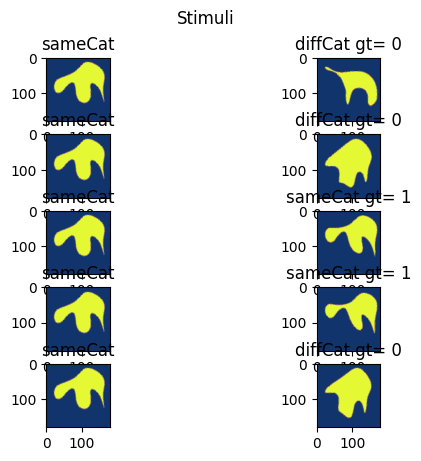

In [328]:
fig, ax = plt.subplots(5, 2)
fig.suptitle("Stimuli")

for idx, random in enumerate(randoms):
  pairs = dataset_refA_cond1[random]
  label1 = pairs[0]
  img1 = pairs[2]
  label2 = pairs[1]
  img2 = pairs[3]
  gt = pairs[4]

  ax[idx][0].set_title(label1)
  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = label2 + " gt= " + str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))

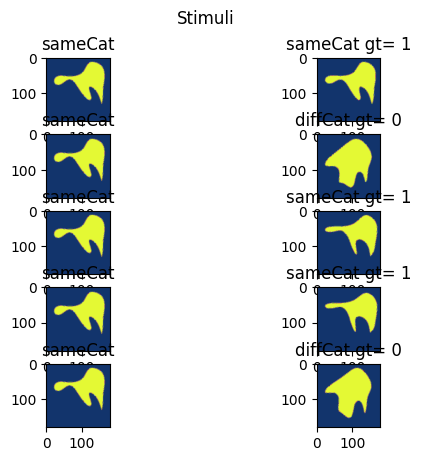

In [329]:
fig, ax = plt.subplots(5, 2)
fig.suptitle("Stimuli")

for idx, random in enumerate(randoms):
  pairs = dataset_refB_cond1[random]
  label1 = pairs[0]
  img1 = pairs[2]
  label2 = pairs[1]
  img2 = pairs[3]
  gt = pairs[4]

  ax[idx][0].set_title(label1)
  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = label2 + " gt= " + str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))

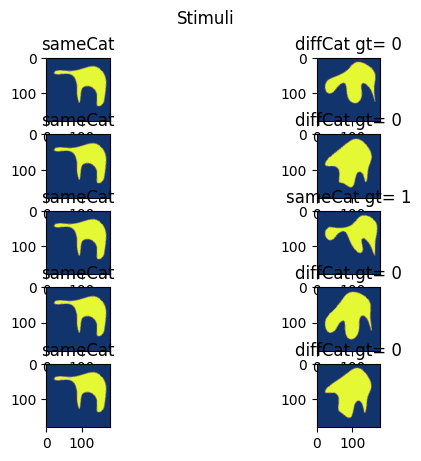

In [330]:
fig, ax = plt.subplots(5, 2)
fig.suptitle("Stimuli")

for idx, random in enumerate(randoms):
  pairs = dataset_refC_cond1[random]
  label1 = pairs[0]
  img1 = pairs[2]
  label2 = pairs[1]
  img2 = pairs[3]
  gt = pairs[4]

  ax[idx][0].set_title(label1)
  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = label2 + " gt= " + str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))

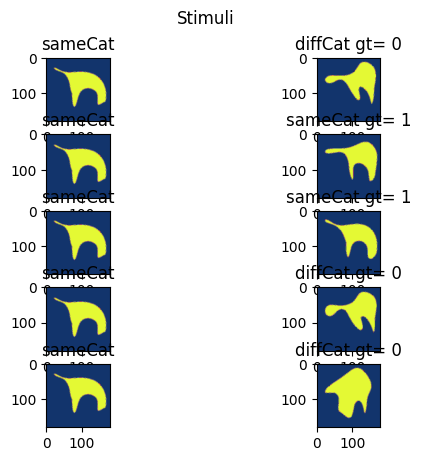

In [331]:
fig, ax = plt.subplots(5, 2)
fig.suptitle("Stimuli")

for idx, random in enumerate(randoms):
  pairs = dataset_refD_cond1[random]
  label1 = pairs[0]
  img1 = pairs[2]
  label2 = pairs[1]
  img2 = pairs[3]
  gt = pairs[4]

  ax[idx][0].set_title(label1)
  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = label2 + " gt= " + str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))